# Importing the necessary libraries.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split #sklearn for train and test split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining compare_predictions for future call.


In [4]:
def compare_predictions(preds_untrained, preds_trained, true_values):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(true_values, preds_untrained)
    plt.title('Predictions Before Training')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')

    plt.subplot(1, 2, 2)
    plt.scatter(true_values, preds_trained)
    plt.title('Predictions After Training')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')

    plt.tight_layout()
    plt.show()

# Reading the dataset.


In [5]:
df = pd.read_csv('dataset_price.csv') #defining the dataframe to load and read the dataset 

In [6]:
df.describe()

,date,age,distance,stores,latitude,longitude,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2008.912800,18.945000,4.977800,4.915000,84.97140,124.994200,13906.638600
std,5.457578,11.329539,3.199837,3.142889,3.16199,3.167992,1020.774876
min,2000.000000,0.000000,0.000000,0.000000,80.00000,120.000000,11263.000000
25%,2004.000000,9.000000,2.000000,2.000000,82.00000,122.000000,13197.750000
50%,2009.000000,19.000000,5.000000,5.000000,85.00000,125.000000,13893.500000
75%,2014.000000,29.000000,8.000000,8.000000,88.00000,128.000000,14614.000000
max,2018.000000,38.000000,10.000000,10.000000,90.00000,130.000000,16964.000000


# Data preprocessing and data cleaning

In [8]:
df.head()

,age,distance,stores,latitude,longitude,price
0,21,9,6,84,121,14264
1,4,2,3,86,121,12032
2,18,3,7,90,120,13560
3,13,2,2,80,128,12029
4,25,5,8,81,122,14157


In [28]:
df.isna() #viewing the rows with false values

,distance,stores,latitude,longitude,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4995,False,False,False,False,False
4996,False,False,False,False,False
4997,False,False,False,False,False
4998,False,False,False,False,False


In [9]:
df.dropna() #drop the false or NaN values from the table

,age,distance,stores,latitude,longitude,price
0,21,9,6,84,121,14264
1,4,2,3,86,121,12032
2,18,3,7,90,120,13560
3,13,2,2,80,128,12029
4,25,5,8,81,122,14157
...,...,...,...,...,...,...
4995,17,6,3,90,125,13539
4996,7,10,0,85,129,14757
4997,6,10,5,90,125,14102
4998,37,3,5,81,128,14313


In [30]:
df.isna().sum()

distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

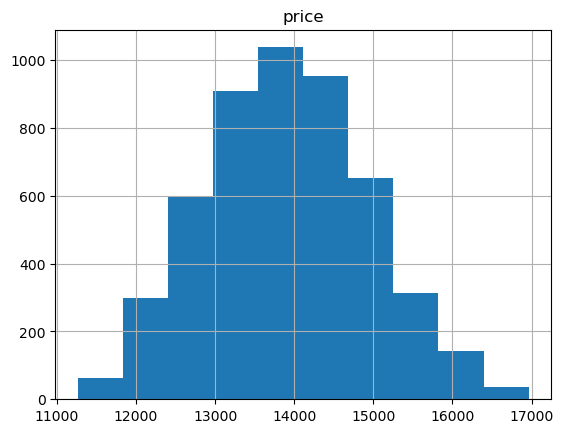

In [27]:
df.hist("price")
plt.show() #ploting the price history from the dataframe

In [10]:
df = df.iloc[:, 1:] #defining the dataframe(pandas) for the rows and columns. 
df_norm = (df - df.mean()) / df.std() 

# Declare X and Y variables for test and train split

In [13]:
X = df_norm.iloc[:, :5]
Y = df_norm.iloc[:, -1]
X_arr = X.values
Y_arr = Y.values

In [31]:
X_arr #viewing X array values

array([[ 1.25700164e+00,  3.45223786e-01, -3.07211584e-01,
        -1.26079862e+00,  3.50088358e-01],
       [-9.30609988e-01, -6.09312028e-01,  3.25301457e-01,
        -1.26079862e+00, -1.83648583e+00],
       [-6.18094041e-01,  6.63402390e-01,  1.59032754e+00,
        -1.57645598e+00, -3.39583789e-01],
       ...,
       [ 1.56951759e+00,  2.70451814e-02,  1.59032754e+00,
         1.83081268e-03,  1.91385392e-01],
       [-6.18094041e-01,  2.70451814e-02, -1.25598114e+00,
         9.48802888e-01,  3.98091106e-01],
       [-1.24312594e+00,  1.29975960e+00,  1.59032754e+00,
         6.33145529e-01, -1.11350566e+00]])

In [32]:
Y_arr #viewing Y array values

array([ 0.35008836, -1.83648583, -0.33958379, ...,  0.19138539,
        0.39809111, -1.11350566])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size=0.01, shuffle=True, random_state=1)

In [21]:
def get_model(): #define the model before training. 
    model = Sequential([
        Dense(10, input_shape=(5,), activation='relu'),Dense(20, activation='relu'),
        Dense(5, activation='relu'),Dense(1)])
    model.compile(loss='mse', optimizer='adadelta')
    return model

In [22]:
model = get_model()
preds_on_untrained = model.predict(X_test) #prediction before training with respect to X. 

2/2 [==============================] - 2s 6ms/step


# Train the model

In [23]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Epoch 1/1000
155/155 [==============================] - 1s 4ms/step - loss: 1.0540 - val_loss: 0.7987
Epoch 2/1000
155/155 [==============================] - 1s 3ms/step - loss: 1.0516 - val_loss: 0.7966
Epoch 3/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.0491 - val_loss: 0.7946
Epoch 4/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.0467 - val_loss: 0.7925
Epoch 5/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.0443 - val_loss: 0.7905
Epoch 6/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.0418 - val_loss: 0.7884
Epoch 7/1000
155/155 [==============================] - 1s 3ms/step - loss: 1.0394 - val_loss: 0.7864
Epoch 8/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.0369 - val_loss: 0.7843
Epoch 9/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.0344 - val_loss: 0.7822
Epoch 10/1000
155/155 [==============================] - 0s 3ms/step - loss: 1.031

In [24]:
preds_on_trained = model.predict(X_test) #prediction after training with respect to X. 

2/2 [==============================] - 0s 7ms/step


# Compare predictions 

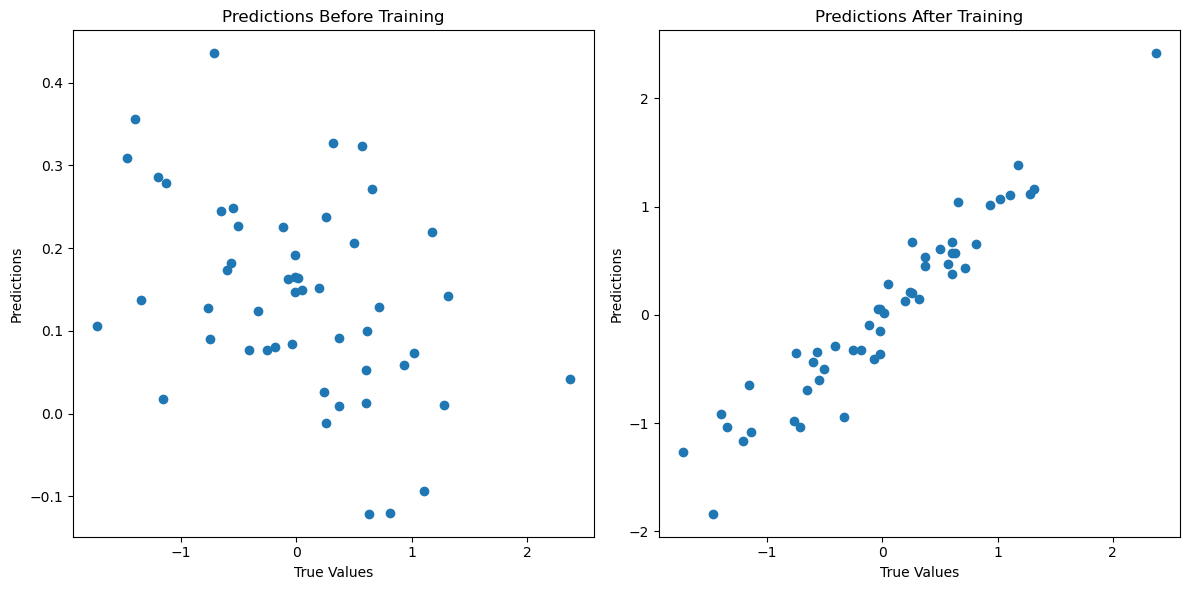

In [25]:
#plot values before and after the trainig using matplot 
compare_predictions(preds_on_untrained, preds_on_trained, y_test)            

In [26]:
y_mean = df['price'].mean()
y_std = df['price'].std() #this will be the additional code for getting the mean and standard values